A local school district has a goal to reach a 95% graduation rate by the end of the 
decade by identifying students who need intervention before they drop out of 
school. As a software engineer contacted by the school district, your task is to 
model the factors that predict how likely a student is to pass their high school final 
exam, by constructing an intervention system that leverages supervised learning 
techniques. The board of supervisors has asked that you find the most effective 
model that uses the least amount of computation costs to save on the budget. You 
will need to analyze the dataset on students' performance and develop a model 
that will predict a given student will pass, quantifying whether an intervention is 
necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
data.shape

(395, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [7]:
passed= len(data[data['passed']=='yes'])
failed= len(data[data['passed']=='no'])

In [8]:
print('no: of students passed =',passed)
print('no: of students failed =',failed)

no: of students passed = 265
no: of students failed = 130


### Pre-processing

In [9]:
data.drop(['Mjob','Fjob','reason','famsize','guardian','sex','age','nursery'],axis=1,inplace=True)


In [10]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,address_U,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,4,4,2,2,0,4,3,4,1,1,...,1,0,1,0,0,0,1,0,0,0
1,1,1,1,2,0,5,3,3,1,1,...,1,1,0,1,0,0,1,1,0,0
2,1,1,1,2,3,4,3,2,2,3,...,1,1,1,0,1,0,1,1,0,1
3,4,2,1,3,0,3,2,2,1,1,...,1,1,0,1,1,1,1,1,1,1
4,3,3,1,2,0,4,3,2,1,2,...,1,1,0,1,1,0,1,0,0,1


In [11]:
data.columns

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'address_U', 'Pstatus_T', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'higher_yes', 'internet_yes', 'romantic_yes',
       'passed_yes'],
      dtype='object')

In [12]:
x=data.drop(['passed_yes'],axis=1)
y=data['passed_yes']


In [13]:
x['Pedu']=(x['Medu']+x['Fedu'])

In [14]:
x=x.drop(['Medu','Fedu'],axis=1)


In [15]:
x.columns

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'school_MS', 'address_U',
       'Pstatus_T', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'Pedu'],
      dtype='object')

In [16]:
x.shape

(395, 21)

### Modelling

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
import warnings
warnings.filterwarnings("ignore")

#### 1.Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)


In [20]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.8034188034188035

In [21]:
confusion_matrix(y_test,y_pred)

array([[ 9, 18],
       [ 5, 47]], dtype=int64)

#### 2.Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_predict=random_model.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predict)

0.8000000000000002

In [24]:
confusion_matrix(y_test,y_predict)

array([[ 7, 20],
       [ 4, 48]], dtype=int64)

#### 3.K Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [27]:
acc_values

[0.620253164556962,
 0.6329113924050633,
 0.6708860759493671,
 0.7215189873417721,
 0.6962025316455697,
 0.7088607594936709,
 0.6708860759493671,
 0.6835443037974683,
 0.7088607594936709,
 0.6962025316455697,
 0.6582278481012658,
 0.7088607594936709]

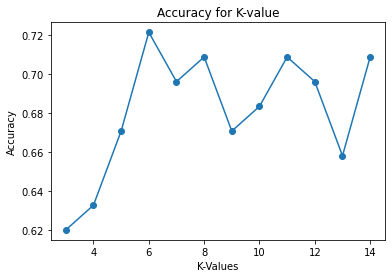

In [28]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [29]:
classifier= KNeighborsClassifier(n_neighbors=6,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [30]:
f1_score(y_test,y_predict)

0.8035714285714286

In [31]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [ 7, 45]], dtype=int64)

#### 4.Support Vector Machine

In [32]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_predict= svm_model.predict(x_test)

In [33]:
f1_score(y_test,y_predict)

0.8099173553719008

In [34]:
confusion_matrix(y_test,y_predict)

array([[ 7, 20],
       [ 3, 49]], dtype=int64)

#### 5.Decision Tree

In [35]:
 from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)

In [36]:
f1_score(y_test,y_predict)

0.7476635514018691

In [37]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [12, 40]], dtype=int64)

standard scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [39]:
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [40]:
acc_values

[0.620253164556962,
 0.569620253164557,
 0.6455696202531646,
 0.6835443037974683,
 0.6708860759493671,
 0.6835443037974683,
 0.6835443037974683,
 0.7088607594936709,
 0.7088607594936709,
 0.7215189873417721,
 0.6835443037974683,
 0.7088607594936709]

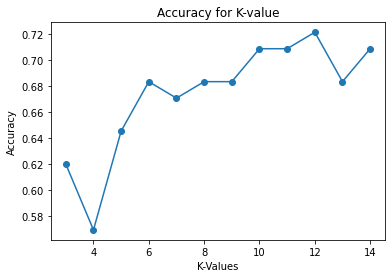

In [41]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [42]:
classifier= KNeighborsClassifier(n_neighbors=12,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [43]:
f1_score(y_test,y_predict)

0.8166666666666668

In [44]:
confusion_matrix(y_test,y_predict)

array([[ 8, 19],
       [ 3, 49]], dtype=int64)

From the F-score we get to know logistic regression and K-nearest neighbors are best models